In [1]:
import pandas as pd
import param
import panel as pn
import os
import plotly.express as px

import glob
pn.extension('plotly')

In [2]:
df = pd.read_csv('/Volumes/BIRDSONG/train.csv')

In [49]:
class BirdClass(param.Parameterized):
    df=df.copy()
    bird = pn.widgets.Select(value='American Avocet',options=list(df.species.unique()))
    
    @pn.depends(bird.param.value)
    def print_image(self,bird):
        if bird!=None:
            return pn.pane.JPG(glob.glob(f'downloads/{bird}/*.jpg')[0], width=300)
        
    @pn.depends(bird.param.value)  
    def mapper(self,bird):
        return px.scatter_geo(df[df.species==bird],lat='latitude',lon='longitude', hover_data=['elevation'],
                             width=1000, height=600, template='seaborn')
    
    @pn.depends(bird.param.value) 
    def audio_box(self,bird):
        if bird!=None:
            
            return pn.pane.Audio(glob.glob(f'downloads/{bird}/*.mp3')[0])
            #return pn.pane.Audio('http://ccrma.stanford.edu/~jos/mp3/pno-cs.mp3', name='Audio')
    
        
    

Column
    [0] Select(options=['Alder Flycatcher', ...], value="Lincoln's Sparrow")
    [1] Row
        [0] Column
            [0] Spacer(height=100, sizing_mode='fixed', width=200)
            [1] ParamMethod(method)
            [2] ParamMethod(method)
        [1] ParamMethod(method)
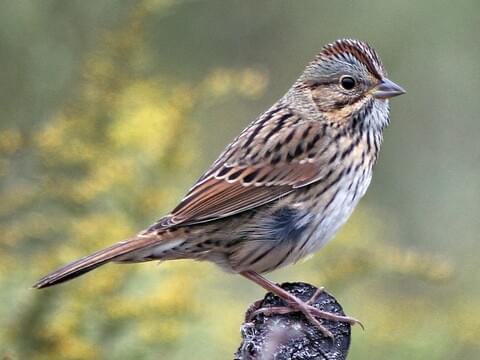

In [55]:
db = BirdClass()
dashboard = pn.Column(db.bird, pn.Row(
    pn.Column(pn.Spacer(width=200, height=100),
    db.print_image,
    db.audio_box,
             ),
    db.mapper))
dashboard

In [53]:
pn.serve(dashboard)

Launching server at http://localhost:49744


In [40]:
for bird in df.species.unique():
    print(bird)
    

Alder Flycatcher
American Avocet
American Bittern
American Crow
American Goldfinch
American Kestrel
Buff-bellied Pipit
American Redstart
American Robin
American Wigeon
American Woodcock
American Tree Sparrow
Anna's Hummingbird
Ash-throated Flycatcher
Baird's Sandpiper
Bald Eagle
Baltimore Oriole
Sand Martin
Barn Swallow
Black-and-white Warbler
Belted Kingfisher
Bell's Sparrow
Bewick's Wren
Black-billed Cuckoo
Black-billed Magpie
Blackburnian Warbler
Black-capped Chickadee
Black-chinned Hummingbird
Black-headed Grosbeak
Blackpoll Warbler
Black-throated Sparrow
Black Phoebe
Blue Grosbeak
Blue Jay
Brown-headed Cowbird
Bobolink
Bonaparte's Gull
Barred Owl
Brewer's Blackbird
Brewer's Sparrow
Brown Creeper
Brown Thrasher
Broad-tailed Hummingbird
Broad-winged Hawk
Black-throated Blue Warbler
Black-throated Green Warbler
Black-throated Grey Warbler
Bufflehead
Blue-grey Gnatcatcher
Blue-headed Vireo
Bullock's Oriole
American Bushtit
Blue-winged Teal
Blue-winged Warbler
Cactus Wren
California Gu

In [44]:
bird = 'Wild Turkey'
pn.pane.Audio(glob.glob(f'downloads/{bird}/*.mp3')[0])

Audio(str)